In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df


,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72
...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000
5438,Simplicity sells,David Pogue,February 2006,2000000,60000


In [3]:
anos = []
for c in df['date']:
    anos.append(c.split(' ')[1])
anos = pd.DataFrame(anos, columns=['anos'])


In [4]:
df = df.join(anos, lsuffix='anos')
df

,title,author,date,views,likes,anos
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,2021
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,2006
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,2006
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,2006
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,2006


# Anos sem repetição: 

In [5]:
anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index().drop(['index'], axis=1)
anossemrep

,Ano
0,2022
1,2021
2,2020
3,2019
4,2018
5,2017
6,2016
7,2015
8,2014
9,2013


# Contagem por ano de quantos vídeos foram postado  

In [6]:
contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano, columns=['Recorrência'])


# Data Frame do ano e da recorrência

In [7]:
anossemrep = anossemrep.join(contagemano, how = 'right', lsuffix='std', rsuffix='Recorrência').sort_values(by="Ano", ascending=True).drop([0])
anossemrep

,Ano,Recorrência
29,1970,2
28,1972,1
27,1983,1
26,1984,1
25,1990,1
24,1991,1
23,1994,1
22,1998,6
21,2001,5
20,2002,26


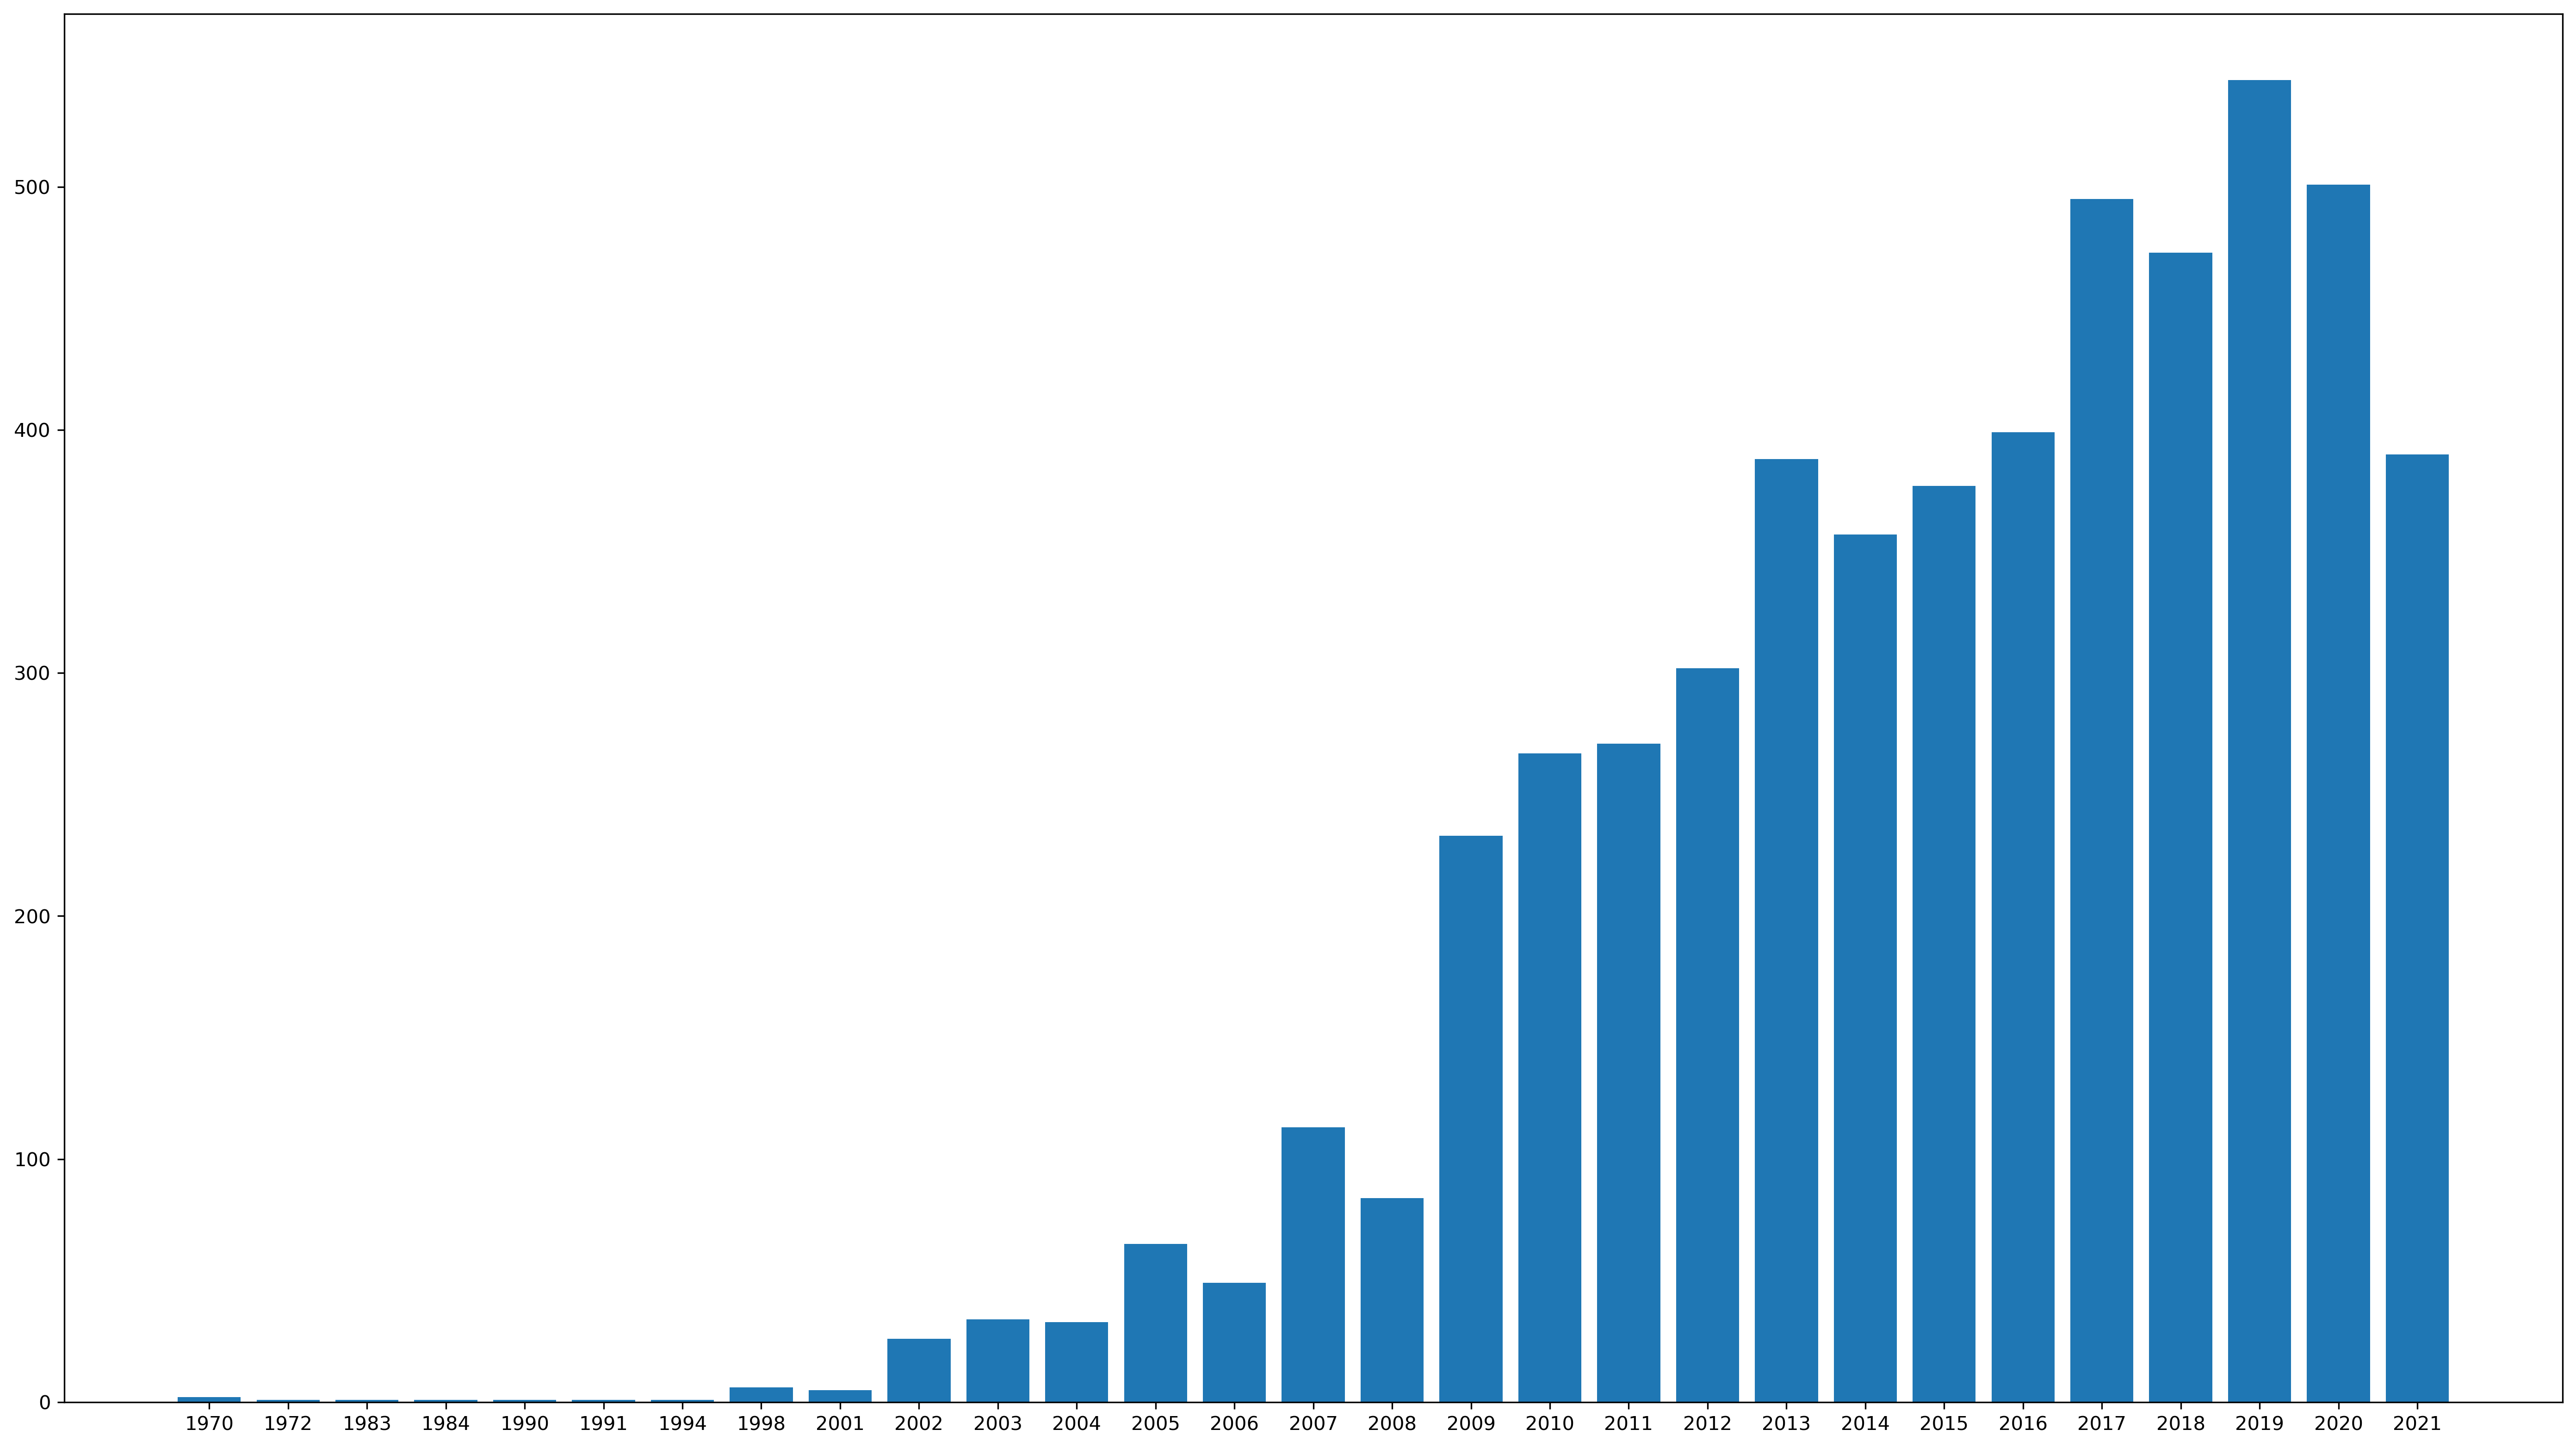

In [13]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.2,1])
ax.bar(anossemrep['Ano'],anossemrep['Recorrência'])
plt.show()